# 8- Modelo Tranformador

## Importando bibliotecas

In [1]:
from math import *
from cmath import *
import numpy as np
from numpy import linalg 
import matplotlib.pyplot as plt
import pandas as pd
from scipy.optimize import curve_fit

## Calculando a impedância do modelo para direfentes frequências

In [2]:
def CalcularImpedanciaAntena(w, L, C):
    Z = (1j*w*L * (1/(1j*w*C)))/(1j*w*L + (1/(1j*w*C))) + 2*1j*w*L
    return Z

f = np.linspace(6e6, 12e6, 1000)

sigma = 10
wc = 7.35e6    
L = sigma/wc
C = 1/(sigma*wc)
Z = []

for i in range(len(f)):
    Z.append(CalcularImpedanciaAntena(f[i], L, C).imag) 



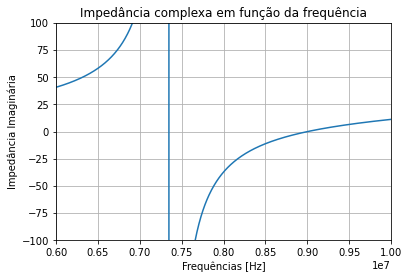

In [3]:
plt.plot(f, Z)
plt.ylim([-100,100])
plt.xlim([6e6, 10e6])
plt.title("Impedância complexa em função da frequência")
plt.xlabel("Frequências [Hz]")
plt.ylabel("Impedância Imaginária")
plt.grid()
plt.show()

## Plotando o ganho em função da mútua

In [4]:
Uf = 1

def CalcularTransformador(XM):
    Z=np.array([[1, -XM],[-XM, 1]])
    V=np.array([Uf,0])
    i=np.dot(linalg.inv(Z),V) # realiza o produto matricial
    return i[0], i[1]

M_inicial = (1/wc)
M_final = 0
lista_M = np.linspace(M_inicial, M_final, 100)

gain = []

# Calculando o ganho em função da frequência
for i in range(len(lista_M)):
    XM  = 1j*wc*lista_M[i]
    i1, i2 = CalcularTransformador(XM)
    print((abs(i2/i1))**2)
    gain.append((abs(i2/i1))**2)


1.0
0.9799000102030406
0.9600040812162026
0.9403122130394866
0.9208244056728907
0.9015406591164171
0.8824609733700641
0.8635853484338335
0.8449137843077241
0.8264462809917357
0.808182838485869
0.7901234567901232
0.7722681359044999
0.7546168758289972
0.7371696765636159
0.7199265381083559
0.7028874604632179
0.6860524436282012
0.6694214876033056
0.6529945923885314
0.6367717579838794
0.6207529843893481
0.6049382716049381
0.5893276196306497
0.5739210284664832
0.5587184981124373
0.5437200285685132
0.528925619834711
0.5143352719110292
0.49994898479746996
0.4857667584940313
0.4717885930007145
0.45801448831751895
0.44444444444444453
0.43107846138149153
0.4179165391286603
0.4049586776859504
0.39220487705336166
0.3796551372308949
0.36730945821854943
0.35516784001632495
0.343230282624222
0.33149678604224064
0.3199673502703804
0.3086419753086419
0.29752066115702475
0.286603407815529
0.27589021528415475
0.26538108356290174
0.25507601265177027
0.2449750025507602
0.23507805325987155
0.2253851647791042

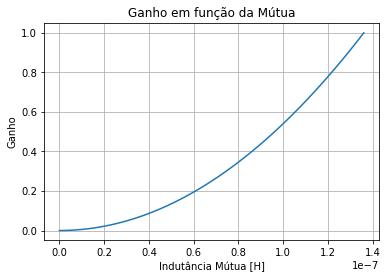

In [5]:
plt.plot(lista_M, gain)
plt.title("Ganho em função da Mútua")
plt.xlabel("Indutância Mútua [H]")
plt.ylabel("Ganho")
plt.grid()
plt.show()

## Exportando valores para excel

In [6]:
data = {'mutua': lista_M, 'ganho': gain}
df = pd.DataFrame(data)
df.to_excel('ganho-mutua2.xlsx')


# Encontrando Indutância Mútua em função da distância

## Importando dados do Matlab

In [7]:
gain_dist = pd.read_excel('matlab-gain-data.xlsx')
distancia = gain_dist['distancia']
ganho = gain_dist['ganho']

## Plotando o ganho em função da mútua e da distância

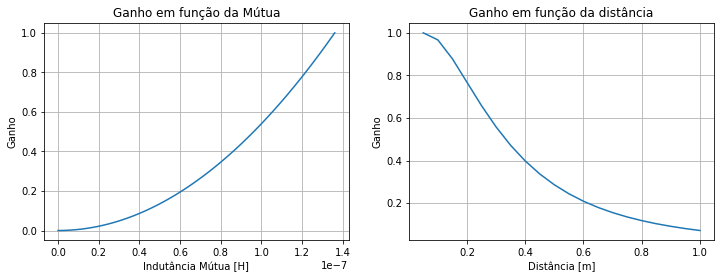

In [8]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(lista_M, gain)
plt.title("Ganho em função da Mútua")
plt.xlabel("Indutância Mútua [H]")
plt.ylabel("Ganho")
plt.grid()

plt.subplot(1, 2, 2)
plt.plot(distancia, ganho)
plt.title("Ganho em função da distância")
plt.xlabel("Distância [m]")
plt.ylabel("Ganho")
plt.grid()

plt.show()

## Obtendo a lei de relação

A partir dos dados obtidos anteriormente, foram exportados os gráficos para o Excel e obtido a lei:


<img src="ganho-mutua.png" height=400px> 

Pelo excel, foi obtido a seguinte lei que relaciona o ganho em função da distância, com os dados do Matlab:

<img src="ganho-distancia.png" height=400px> 

## Equacionamento



### 8-a) 
O parâmetro é a Indutância Mútua. Ele se relaciona através da relação abaixo:  

<img src="equacionamento.png">

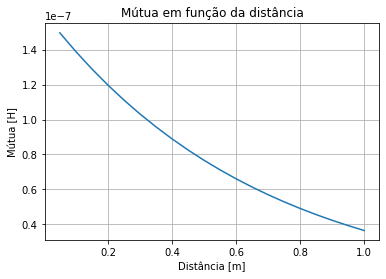

In [12]:
spacing = np.linspace(5e-2, 1, 20)
M = []


for i in range(len(spacing)):
    m = ((1.2981*exp(-2.969*spacing[i]))/(5*10**13))**(1/2)
    M.append(m.real)

plt.plot(spacing, M)
plt.title("Mútua em função da distância")
plt.xlabel("Distância [m]")
plt.ylabel("Mútua [H]")
plt.grid()
plt.show()